# Source of Energy for Every Country. 

Importing all library

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd

- set the url and use the request to get the data from the url

In [2]:
url='https://dewesoft.com/blog/countries-electricity-source'
data  = requests.get(url).text

- Use BeautifulSoup library to parse the HTML file to extract,navigate,search data

In [3]:
soup = BeautifulSoup(data, 'html.parser')

In [4]:
soup

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><link href="https://www.datocms-assets.com/53444/1628150795-dewesoft-symbol.png?h=32&amp;w=32" rel="icon" type="image/png"/><title>The Most Common Electricity Source in Each Country</title><meta content="The Most Common Electricity Source in Each Country" property="og:title"/><meta content="The Most Common Electricity Source in Each Country" name="twitter:title"/><meta content="Dewesoft looked at electricity use data around the world to determine the most common sources of electricity for each country. See the infographic." name="description"/><meta content="Dewesoft looked at electricity use data around the world to determine the most common sources of electricity for each country. See the infographic." property="og:description"/><meta content="Dewesoft looked at electricity use data around the world to determine the most common sources of electricity for each country. See 

- use __find__ function to find the table by including also the table class to find the right table.
- use __prettify__ to make it easy to read. 

In [5]:
table=soup.find("table",class_="chakra-table css-1qi9lo1")
print(table.prettify())

<table class="chakra-table css-1qi9lo1">
 <thead class="css-0">
  <tr class="css-0">
   <style data-emotion="css 1pt5pj9">
    .css-1pt5pj9{font-family:var(--chakra-fonts-heading);font-weight:var(--chakra-fontWeights-bold);text-transform:uppercase;letter-spacing:var(--chakra-letterSpacings-wider);-webkit-padding-start:var(--chakra-space-4);padding-inline-start:var(--chakra-space-4);-webkit-padding-end:var(--chakra-space-4);padding-inline-end:var(--chakra-space-4);padding-top:var(--chakra-space-1);padding-bottom:var(--chakra-space-1);line-height:var(--chakra-lineHeights-4);font-size:var(--chakra-fontSizes-xs);color:var(--chakra-colors-gray-600);border-bottom:var(--chakra-borders-1px);border-color:var(--chakra-colors-blackAlpha-100);text-align:left;}.css-1pt5pj9[data-is-numeric=true]{text-align:end;}
   </style>
   <th class="css-1pt5pj9">
    Country
   </th>
   <th class="css-1pt5pj9">
    Coal electricity per capita (kWh)
   </th>
   <th class="css-1pt5pj9">
    Gas electricity per ca

- Extracting the table head 

In [6]:
columns=table.find("thead").find_all("th")
columns
column_names=[c.text for c in columns]
column_names=np.array(column_names)

In [7]:
column_names.shape

(9,)

- Extracting the data by row using below functions

In [8]:
table_rows=table.find("tbody").find_all("tr")

Data=[]
for tr in table_rows:
    td=tr.find_all('td')
    row=[[tr.text] for tr in td]
    Data.append(row)

Data

[[['Afghanistan'],
  ['0.00'],
  ['4.00'],
  ['0.00'],
  ['0.00'],
  ['22.08'],
  ['0.00'],
  ['1.05'],
  ['0.00']],
 [['Albania'],
  ['0.00'],
  ['0.00'],
  ['0.00'],
  ['0.00'],
  ['1788.94'],
  ['0.00'],
  ['7.64'],
  ['0.00']],
 [['Algeria'],
  ['0.00'],
  ['1709.89'],
  ['0.00'],
  ['0.00'],
  ['2.47'],
  ['0.26'],
  ['14.28'],
  ['0.00']],
 [['American Samoa'],
  ['0.00'],
  ['0.00'],
  ['2963.64'],
  ['0.00'],
  ['0.00'],
  ['0.00'],
  ['0.00'],
  ['0.00']],
 [['Angola'],
  ['0.00'],
  ['40.33'],
  ['33.73'],
  ['0.00'],
  ['309.50'],
  ['0.00'],
  ['0.57'],
  ['7.94']],
 [['Antigua and Barbuda'],
  ['0.00'],
  ['0.00'],
  ['3367.70'],
  ['0.00'],
  ['0.00'],
  ['0.00'],
  ['154.64'],
  ['0.00']],
 [['Argentina'],
  ['31.99'],
  ['1918.09'],
  ['77.26'],
  ['221.49'],
  ['461.41'],
  ['208.42'],
  ['29.74'],
  ['41.90']],
 [['Armenia'],
  ['0.00'],
  ['968.28'],
  ['0.00'],
  ['685.94'],
  ['793.54'],
  ['1.01'],
  ['4.39'],
  ['0.00']],
 [['Aruba'],
  ['0.00'],
  ['0.00'],
  ['

- as we can see the shape of the Data that we scrape from the web is in 3-D array so i change it to 2-D array to change it to Pandas Dataframe

In [9]:
data=np.array(Data)

In [10]:
data.shape

(206, 9, 1)

In [11]:
data=np.reshape(data,(206,9))

In [12]:
data.shape

(206, 9)

we use __pd.Dataframe__ to convert the headers and data into Dataframe

In [13]:
df=pd.DataFrame(data,columns=column_names)

In [14]:
df.head()

,Country,Coal electricity per capita (kWh),Gas electricity per capita (kWh),Oil electricity per capita (kWh),Nuclear electricity per capita (kWh),Hydro electricity per capita (kWh),Wind electricity per capita (kWh),Solar electricity per capita (kWh),Other renewable electricity per capita (kWh)
0,Afghanistan,0.00,4.00,0.00,0.00,22.08,0.00,1.05,0.00
1,Albania,0.00,0.00,0.00,0.00,1788.94,0.00,7.64,0.00
2,Algeria,0.00,1709.89,0.00,0.00,2.47,0.26,14.28,0.00
3,American Samoa,0.00,0.00,2963.64,0.00,0.00,0.00,0.00,0.00
4,Angola,0.00,40.33,33.73,0.00,309.50,0.00,0.57,7.94


- Cannot directly change the parameter to numeric due to got some data is set to N/A. so we need to discover which column is it and remove it first
- From below function got 3 Data with N/A but after checking all 3 is from same row.
- Proceed to remove the row as we cannot get the value of the N/A data.

In [15]:
df[['Coal electricity per capita (kWh)', 'Gas electricity per capita (kWh)','Oil electricity per capita (kWh)','Nuclear electricity per capita (kWh)','Hydro electricity per capita (kWh)','Wind electricity per capita (kWh)','Solar electricity per capita (kWh)','Other renewable electricity per capita (kWh)']] = df[['Coal electricity per capita (kWh)', 'Gas electricity per capita (kWh)','Oil electricity per capita (kWh)','Nuclear electricity per capita (kWh)','Hydro electricity per capita (kWh)','Wind electricity per capita (kWh)','Solar electricity per capita (kWh)','Other renewable electricity per capita (kWh)']].apply(pd.to_numeric)

ValueError: Unable to parse string "N/A" at position 136

In [16]:
occurrences = (df == 'N/A').sum().sum()
occurrences

3

In [17]:
NA = df[(df['Coal electricity per capita (kWh)']=='N/A')| (df['Gas electricity per capita (kWh)']=='N/A')|(df['Oil electricity per capita (kWh)']=='N/A')|(df['Nuclear electricity per capita (kWh)']=='N/A')|(df['Hydro electricity per capita (kWh)']=='N/A')|(df['Wind electricity per capita (kWh)']=='N/A')|(df['Solar electricity per capita (kWh)']=='N/A')|(df['Other renewable electricity per capita (kWh)']=='N/A')]

In [18]:
NA

,Country,Coal electricity per capita (kWh),Gas electricity per capita (kWh),Oil electricity per capita (kWh),Nuclear electricity per capita (kWh),Hydro electricity per capita (kWh),Wind electricity per capita (kWh),Solar electricity per capita (kWh),Other renewable electricity per capita (kWh)
136,North Macedonia,N/A,N/A,N/A,0.00,558.65,48.87,11.15,26.45


In [19]:
df = df.drop(index=136).reset_index(drop=True)

In [20]:
occurrences = (df == 'N/A').sum().sum()
occurrences

0

- Check wether all of the numeric data have been changed into numerical data type

In [21]:
df[['Coal electricity per capita (kWh)', 'Gas electricity per capita (kWh)','Oil electricity per capita (kWh)','Nuclear electricity per capita (kWh)','Hydro electricity per capita (kWh)','Wind electricity per capita (kWh)','Solar electricity per capita (kWh)','Other renewable electricity per capita (kWh)']] = df[['Coal electricity per capita (kWh)', 'Gas electricity per capita (kWh)','Oil electricity per capita (kWh)','Nuclear electricity per capita (kWh)','Hydro electricity per capita (kWh)','Wind electricity per capita (kWh)','Solar electricity per capita (kWh)','Other renewable electricity per capita (kWh)']].apply(pd.to_numeric)

In [22]:
df.dtypes

Country                                          object
Coal electricity per capita (kWh)               float64
Gas electricity per capita (kWh)                float64
Oil electricity per capita (kWh)                float64
Nuclear electricity per capita (kWh)            float64
Hydro electricity per capita (kWh)              float64
Wind electricity per capita (kWh)               float64
Solar electricity per capita (kWh)              float64
Other renewable electricity per capita (kWh)    float64
dtype: object

- Create a new row which indicates the main Source of electricity for every Country
- Create a new dataframe that counts the total number of Country for all of the energy type use as the Main Source of eLectricity per capita 

In [23]:
df['Highest electricity Source per capita'] = df.iloc[:, 1:].idxmax(axis=1)

In [24]:
df.head()

,Country,Coal electricity per capita (kWh),Gas electricity per capita (kWh),Oil electricity per capita (kWh),Nuclear electricity per capita (kWh),Hydro electricity per capita (kWh),Wind electricity per capita (kWh),Solar electricity per capita (kWh),Other renewable electricity per capita (kWh),Highest electricity Source per capita
0,Afghanistan,0.0,4.00,0.00,0.0,22.08,0.00,1.05,0.00,Hydro electricity per capita (kWh)
1,Albania,0.0,0.00,0.00,0.0,1788.94,0.00,7.64,0.00,Hydro electricity per capita (kWh)
2,Algeria,0.0,1709.89,0.00,0.0,2.47,0.26,14.28,0.00,Gas electricity per capita (kWh)
3,American Samoa,0.0,0.00,2963.64,0.0,0.00,0.00,0.00,0.00,Oil electricity per capita (kWh)
4,Angola,0.0,40.33,33.73,0.0,309.50,0.00,0.57,7.94,Hydro electricity per capita (kWh)


In [25]:
main_source = df['Highest electricity Source per capita'].value_counts().reset_index()

In [26]:
main_source['Highest electricity Source per capita'] = main_source['Highest electricity Source per capita'].replace('Coal electricity per capita (kWh)', "Coal")
main_source['Highest electricity Source per capita'] = main_source['Highest electricity Source per capita'].replace('Gas electricity per capita (kWh)', "Gas")
main_source['Highest electricity Source per capita'] = main_source['Highest electricity Source per capita'].replace('Oil electricity per capita (kWh)', "Oil")
main_source['Highest electricity Source per capita'] = main_source['Highest electricity Source per capita'].replace('Nuclear electricity per capita (kWh)', "Nuclear")
main_source['Highest electricity Source per capita'] = main_source['Highest electricity Source per capita'].replace('Hydro electricity per capita (kWh)',"Hydro")
main_source['Highest electricity Source per capita'] = main_source['Highest electricity Source per capita'].replace('Wind electricity per capita (kWh)', "Wind")
main_source['Highest electricity Source per capita'] = main_source['Highest electricity Source per capita'].replace('Solar electricity per capita (kWh)', "Solar")
main_source['Highest electricity Source per capita'] = main_source['Highest electricity Source per capita'].replace('Other renewable electricity per capita (kWh)', "Other Renewable")

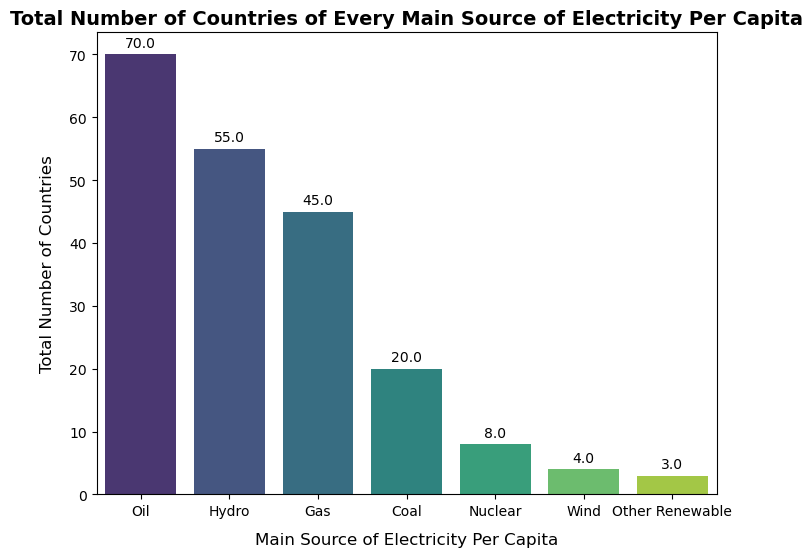

In [27]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Highest electricity Source per capita', y='count', data=main_source, palette='viridis')
ax.set_title("Total Number of Countries of Every Main Source of Electricity Per Capita", fontsize=14, fontweight="bold")
ax.set_xlabel("Main Source of Electricity Per Capita", fontsize=12, labelpad=10)
ax.set_ylabel("Total Number of Countries", fontsize=12, labelpad=10)
for bar in ax.containers:
    ax.bar_label(bar, fmt="%.1f", padding=3)
plt.show()

- To use geopandas for plotting world map we need to use ISO_A3 code for the country to ensure data merging with GeoPandas can be done.
- Then we remove the country that does not have ISO_A3 

In [28]:
import pycountry 
def alpha3code(column):
    ISO_A3=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            ISO_A3.append(code)
        except:
            ISO_A3.append('None')
    return ISO_A3
# create a column for code 
df['ISO_A3']=alpha3code(df.Country)
df.head()

,Country,Coal electricity per capita (kWh),Gas electricity per capita (kWh),Oil electricity per capita (kWh),Nuclear electricity per capita (kWh),Hydro electricity per capita (kWh),Wind electricity per capita (kWh),Solar electricity per capita (kWh),Other renewable electricity per capita (kWh),Highest electricity Source per capita,ISO_A3
0,Afghanistan,0.0,4.00,0.00,0.0,22.08,0.00,1.05,0.00,Hydro electricity per capita (kWh),AFG
1,Albania,0.0,0.00,0.00,0.0,1788.94,0.00,7.64,0.00,Hydro electricity per capita (kWh),ALB
2,Algeria,0.0,1709.89,0.00,0.0,2.47,0.26,14.28,0.00,Gas electricity per capita (kWh),DZA
3,American Samoa,0.0,0.00,2963.64,0.0,0.00,0.00,0.00,0.00,Oil electricity per capita (kWh),ASM
4,Angola,0.0,40.33,33.73,0.0,309.50,0.00,0.57,7.94,Hydro electricity per capita (kWh),AGO


In [29]:
df['Highest electricity Source per capita'] = df['Highest electricity Source per capita'].replace('Coal electricity per capita (kWh)', "Coal")
df['Highest electricity Source per capita'] = df['Highest electricity Source per capita'].replace('Gas electricity per capita (kWh)', "Gas")
df['Highest electricity Source per capita'] = df['Highest electricity Source per capita'].replace('Oil electricity per capita (kWh)', "Oil")
df['Highest electricity Source per capita'] = df['Highest electricity Source per capita'].replace('Nuclear electricity per capita (kWh)', "Nuclear")
df['Highest electricity Source per capita'] = df['Highest electricity Source per capita'].replace('Hydro electricity per capita (kWh)',"Hydro")
df['Highest electricity Source per capita'] = df['Highest electricity Source per capita'].replace('Wind electricity per capita (kWh)', "Wind")
df['Highest electricity Source per capita'] = df['Highest electricity Source per capita'].replace('Solar electricity per capita (kWh)', "Solar")
df['Highest electricity Source per capita'] = df['Highest electricity Source per capita'].replace('Other renewable electricity per capita (kWh)', "Other Renewable")

- Create a new Dataframe consit of 'Highest electricity Source per capita','Country','ISO_A3' only
- However there is some missing ISO_A3 due to the country name from the data is diffrent from the one in pycountry
- So,i create a dictionary and fill in the missing value
- Concatenate back the missing_countries name with the main_source2 dataframe

In [30]:
main_source2=df[['Highest electricity Source per capita','Country','ISO_A3']].reset_index(drop=True)

In [31]:
missing_countries = main_source2[main_source2["ISO_A3"]=='None'].reset_index(drop=True)
print(missing_countries)

   Highest electricity Source per capita                       Country ISO_A3
0                                    Gas                       Bolivia   None
1                                    Oil        British Virgin Islands   None
2                                    Gas                        Brunei   None
3                                  Hydro  Democratic Republic of Congo   None
4                                    Oil              Falkland Islands   None
5                                    Gas                          Iran   None
6                                  Hydro                          Laos   None
7                                   Coal                       Moldova   None
8                                  Hydro                   North Korea   None
9                                    Oil                     Palestine   None
10                                   Oil              Papua New Guinea   None
11                                   Oil                       R

In [32]:
main_source2= main_source2[main_source2['ISO_A3'] != 'None'].reset_index(drop=True)

In [33]:
iso_mapping = {
    "Bolivia": "BOL", "British Virgin Islands": "VGB", "Brunei": "BRN",
    "Democratic Republic of Congo": "COD", "Falkland Islands": "FLK", "Iran": "IRN",
    "Laos": "LAO", "Moldova": "MDA", "North Korea": "PRK", "Palestine": "PSE",
    "Papua New Guinea": "PNG", "Reunion": "REU", "Russia": "RUS", "Saint Helena": "SHN",
    "South Korea": "KOR", "Syria": "SYR", "Taiwan": "TWN", "Tanzania": "TZA",
    "Turkey": "TUR", "United States Virgin Islands": "VIR", "Venezuela": "VEN", "Vietnam": "VNM"
}


missing_countries["ISO_A3"] = missing_countries["Country"].map(iso_mapping)

print(missing_countries)

   Highest electricity Source per capita                       Country ISO_A3
0                                    Gas                       Bolivia    BOL
1                                    Oil        British Virgin Islands    VGB
2                                    Gas                        Brunei    BRN
3                                  Hydro  Democratic Republic of Congo    COD
4                                    Oil              Falkland Islands    FLK
5                                    Gas                          Iran    IRN
6                                  Hydro                          Laos    LAO
7                                   Coal                       Moldova    MDA
8                                  Hydro                   North Korea    PRK
9                                    Oil                     Palestine    PSE
10                                   Oil              Papua New Guinea    NaN
11                                   Oil                       R

In [34]:
main_source_all = pd.concat([main_source2, missing_countries], ignore_index=True)  

print(main_source_all)

    Highest electricity Source per capita                       Country ISO_A3
0                                   Hydro                   Afghanistan    AFG
1                                   Hydro                       Albania    ALB
2                                     Gas                       Algeria    DZA
3                                     Oil                American Samoa    ASM
4                                   Hydro                        Angola    AGO
..                                    ...                           ...    ...
200                                   Gas                      Tanzania    TZA
201                                  Coal                        Turkey    TUR
202                                   Oil  United States Virgin Islands    VIR
203                                 Hydro                     Venezuela    VEN
204                                  Coal                       Vietnam    VNM

[205 rows x 3 columns]


- Than, we merge the table with the geopandas library datas based on the ISO_A3
- There will be several column have a missing values for 'Highest electricity Source per capita' column due to no availability of data. so we drop it for the visualization.

In [35]:
world = gpd.read_file("C:\\Users\\Admin\\Desktop\\DATA SCIENCE PROJECT\\IBM Data Science\\London U\\ne_110m_admin_0_countries.shp")

In [36]:
world = world.merge(main_source_all, on="ISO_A3", how="left")

In [37]:
world = world.dropna(subset=['Highest electricity Source per capita'])

In [38]:
world

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,Highest electricity Source per capita,Country
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",Hydro,Fiji
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",Gas,Tanzania
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",Hydro,Canada
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...",Gas,United States
5,Admin-0 country,1,3,Kazakhstan,KA1,1,1,Sovereignty,1,Kazakhstan,...,None,None,None,None,None,None,None,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Coal,Kazakhstan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Admin-0 country,1,5,Bosnia and Herzegovina,BIH,0,2,Sovereign country,1,Bosnia and Herzegovina,...,None,None,None,None,None,None,None,"POLYGON ((18.56 42.65, 17.67492 43.02856, 17.2...",Coal,Bosnia and Herzegovina
173,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,None,None,None,None,None,None,None,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Coal,Serbia
174,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,None,None,None,None,None,None,None,"POLYGON ((20.0707 42.58863, 19.80161 42.50009,...",Hydro,Montenegro
176,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,1,Trinidad and Tobago,...,None,None,None,None,None,None,None,"POLYGON ((-61.68 10.76, -61.105 10.89, -60.895...",Gas,Trinidad and Tobago


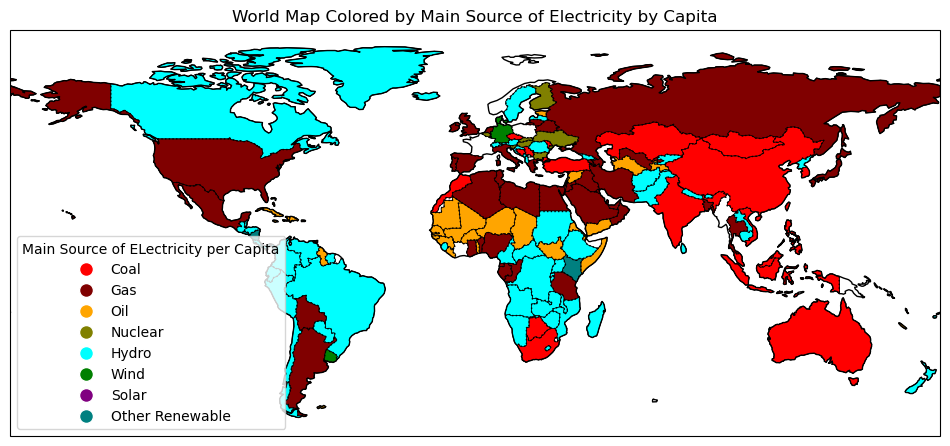

In [45]:
category_colors = {'Coal': 'red', 'Gas': 'maroon', 'Oil': 'orange','Nuclear': 'olive', 'Hydro': 'aqua', 'Wind': 'green', 'Solar': 'purple', 'Other Renewable': 'teal'}
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Add map features
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)

world['color'] = world['Highest electricity Source per capita'].map(category_colors).fillna('gray')

# Plot the world map
world.plot(ax=ax, facecolor=world['color'], edgecolor='black', linewidth=0.5)
# Plot each country with its assigned category color
world.plot(ax=ax, facecolor=world['Highest electricity Source per capita'].map(category_colors), edgecolor='black', linewidth=0.5)

# Create legend manually
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) 
           for category, color in category_colors.items()]
ax.legend(handles, category_colors.keys(), title="Main Source of ELectricity per Capita", loc='lower left')

# Set title
ax.set_title("World Map Colored by Main Source of Electricity by Capita")

# Show the plot
plt.show()

In [40]:
Clean_country = df[(df['Coal electricity per capita (kWh)']==0) & (df['Gas electricity per capita (kWh)']==0)&(df['Oil electricity per capita (kWh)']==0)&(df['Nuclear electricity per capita (kWh)']==0)].reset_index(drop=True)

Clean_country

,Country,Coal electricity per capita (kWh),Gas electricity per capita (kWh),Oil electricity per capita (kWh),Nuclear electricity per capita (kWh),Hydro electricity per capita (kWh),Wind electricity per capita (kWh),Solar electricity per capita (kWh),Other renewable electricity per capita (kWh),Highest electricity Source per capita,ISO_A3
0,Albania,0.0,0.0,0.0,0.0,1788.94,0.00,7.64,0.0,Hydro,ALB
1,Burundi,0.0,0.0,0.0,0.0,19.08,0.00,0.69,0.5,Hydro,BDI
2,Lesotho,0.0,0.0,0.0,0.0,254.51,0.00,0.47,0.0,Hydro,LSO
3,Nepal,0.0,0.0,0.0,0.0,186.17,0.49,2.80,0.0,Hydro,NPL


In [41]:
Clean_country=Clean_country.drop(columns=['Coal electricity per capita (kWh)', 'Gas electricity per capita (kWh)','Oil electricity per capita (kWh)', 'Nuclear electricity per capita (kWh)','ISO_A3', 'Highest electricity Source per capita'])

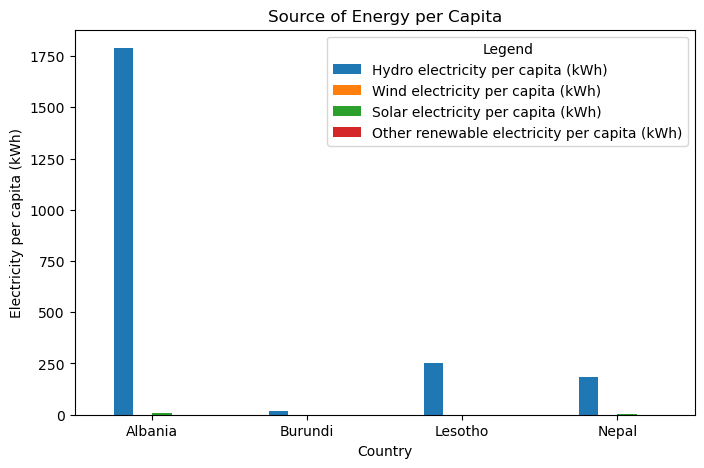

In [42]:
Clean_country.set_index('Country', inplace=True)

# Create a bar plot
ax = Clean_country.plot(kind='bar', figsize=(8, 5))

# Customize plot
plt.title("Source of Energy per Capita")
plt.xlabel("Country")
plt.ylabel("Electricity per capita (kWh)")
plt.legend(title="Legend")
plt.xticks(rotation=0)  # Rotate x labels if needed

# Show plot
plt.show()

In [43]:
No_renewable_energy = df[(df['Hydro electricity per capita (kWh)']==0)&(df['Wind electricity per capita (kWh)']==0)&(df['Solar electricity per capita (kWh)']==0)&(df['Other renewable electricity per capita (kWh)']==0)].reset_index(drop=True)
No_renewable_energy

No_renewable_energy=No_renewable_energy.drop(columns=['Hydro electricity per capita (kWh)', 'Wind electricity per capita (kWh)','Solar electricity per capita (kWh)', 'Other renewable electricity per capita (kWh)','ISO_A3', 'Highest electricity Source per capita'])

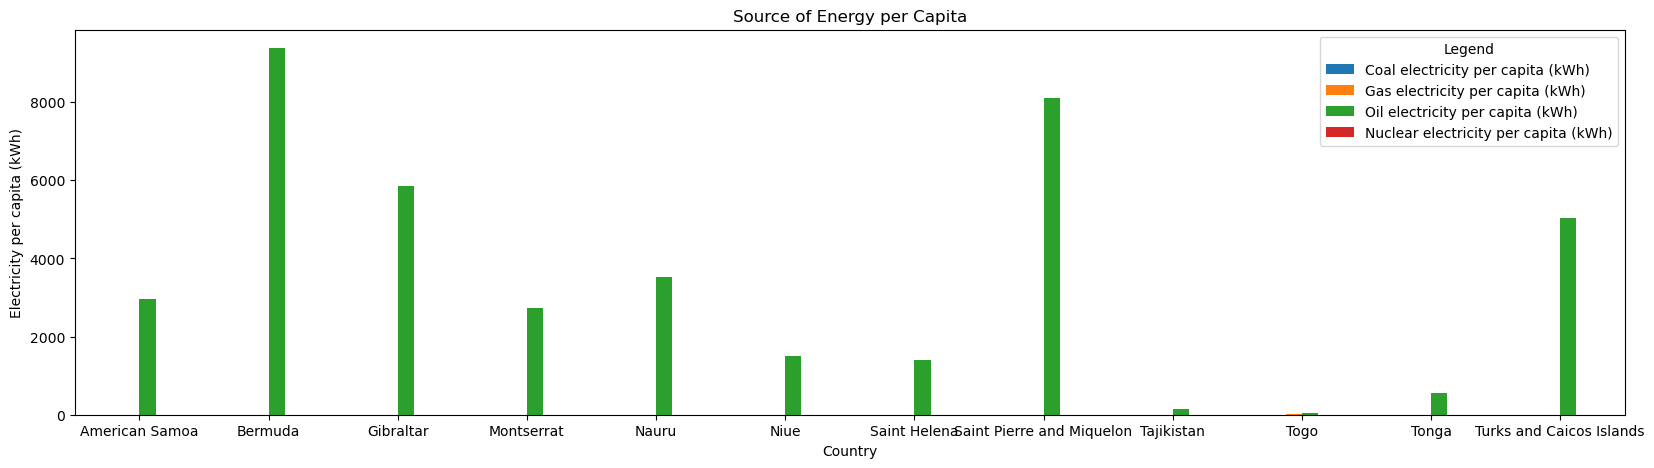

In [44]:
No_renewable_energy.set_index('Country', inplace=True)
# Create a bar plot
ax = No_renewable_energy.plot(kind='bar', figsize=(20, 5))

# Customize plot
plt.title("Source of Energy per Capita")
plt.xlabel("Country")
plt.ylabel("Electricity per capita (kWh)")
plt.legend(title="Legend")
plt.xticks(rotation=0)  # Rotate x labels if needed

# Show plot
plt.show()